In [1]:
import qcodes as qc
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import itertools as it

import transitions
from importlib import reload
reload(transitions )
from transitions import *

from qcodes.data import hdf5_format
reload(hdf5_format)
h5fmt = hdf5_format.HDF5Format()

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


In [2]:
data = qc.load_data('CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17')
data

# data = qc.load_data('Fast transition tracking data/#009_fast_transition_tracking_DFR_14-22-23')
# # data = qc.load_data('Fast transition tracking data/#016_fast_transition_tracking_DFL_17-23-57')
# data.formatter = h5fmt
# data.read()
# data

DataSet:
   location = 'CSD/2018-04-11/#014_4D_DC_TGAC_DBL_DBR_19-06-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | DC_control_DFL_set  | DFL          | (6,)
   Setpoint | DC_control_DFR_set  | DFR          | (6, 6)
   Setpoint | DBL_DBR_set         | DBL_DBR      | (6, 6, 141)
   Setpoint | DC_control_TGAC_set | TGAC         | (6, 6, 141, 81)
   Measured | DC_voltage          | DC_voltage   | (6, 6, 141, 81)

In [3]:
DFL     = data.DC_control_DFL_set
DFR     = data.DC_control_DFR_set[1,:]      
DB      = data.DBL_DBR_set[1,1,:]           
TGAC    = data.DC_control_TGAC_set[1,1,1,:]
Z       = data.DC_voltage
Z       = np.swapaxes(Z,2,3)
Z1 = Z[4,:,:,:]
Z2 = Z[:,4,:,:]
#use 4,i and i,4

# for 4,2 top 2 and bottom 2
# for 4,3 top 2 best, then bottom 2, and middle one
# for 4,4 cut off top, then top 2, and bottom four
# for 4,5 its ok


# DB = data.DBL_DBR_set[1,1,:] #DBL_DBR
# TGAC = data.TGAC_set[1,0:87] #TGAC   
# DFR = data.DC_control_DFR_set[0:85]#DFR    
# Z = data.DC_voltage[0:85,0:87,:]
# Z0 = Z[40,:,:]

#Z[DFL,DFR,DB,TGAC]

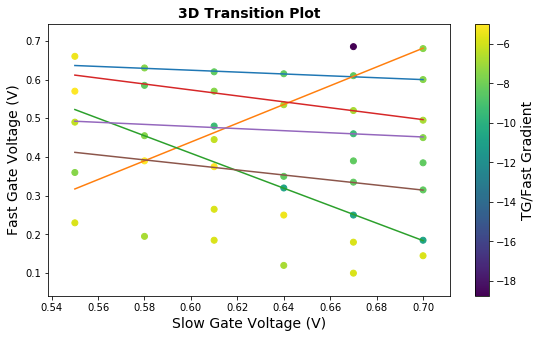

In [4]:
# DB   = DBL_DBR gate voltage array
# DFR  = DFR gate voltage array
# TGAC = TGAC voltage array
# DC_voltage  = Charge stability diagram with axes [DB,TGAC,DFR]
trans1 = find_transitions_3D(DFR,DB,TGAC,Z1)
fit1 = track_transitions_multi(DFR,DB,TGAC,Z1,trans1)
plot_transitions_3D(DFR,DB,TGAC,Z1,trans1,fit1)

[{'TG/fast gradient': -7.9166666666666732,
  'TG/slow gradient': 32.598039215686285,
  'fast intercept': 0.76985714285714313,
  'fast/slow gradient': -0.24285714285714297},
 {'TG/fast gradient': -7.3674242424242484,
  'TG/slow gradient': 9.6096837944664344,
  'fast intercept': 1.0331666666666655,
  'fast/slow gradient': -0.76666666666666483}]

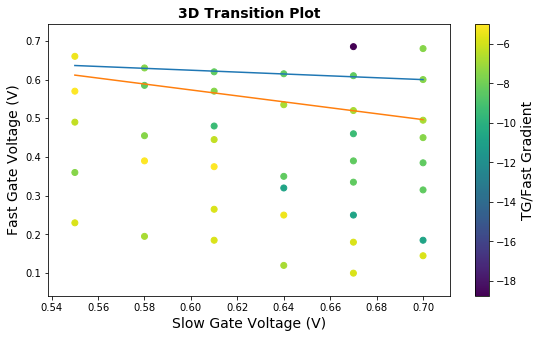

In [7]:
# DB   = DBL_DBR gate voltage array
# DFR  = DFR gate voltage array
# TGAC = TGAC voltage array
# DC_voltage  = Charge stability diagram with axes [DB,TGAC,DFR]
trans1 = find_transitions_3D(DFR,DB,TGAC,Z1)
fit1 = track_transitions_multi(DFR,DB,TGAC,Z1,trans1)
del fit1[1]
del fit1[1]
del fit1[2]
del fit1[2]
plot_transitions_3D(DFR,DB,TGAC,Z1,trans1,fit1)
display(fit1)

[{'TG/fast gradient': -8.3414502164502249,
  'TG/slow gradient': -145.975378787876,
  'fast intercept': 0.56799999999999939,
  'fast/slow gradient': 0.057142857142858293},
 {'TG/fast gradient': -8.601866883116891,
  'TG/slow gradient': 7.7694281524926643,
  'fast intercept': 1.2635714285714297,
  'fast/slow gradient': -1.1071428571428588}]

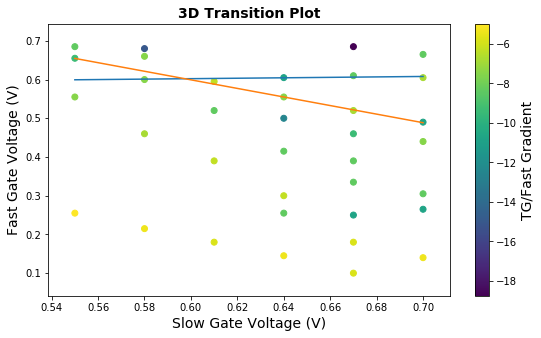

In [8]:
# DB   = DBL_DBR gate voltage array
# DFL  = DFL gate voltage array
# TGAC = TGAC voltage array
# DC_voltage  = Charge stability diagram with axes [DB,TGAC,DFL]
trans2 = find_transitions_3D(DFL,DB,TGAC,Z2)
fit2 = track_transitions_multi(DFL,DB,TGAC,Z2,trans2)
del fit2[2]
del fit2[2]
del fit2[2]
fit2.reverse()
plot_transitions_3D(DFL,DB,TGAC,Z2,trans2,fit2)
display(fit2)